# OLS

## 対数変換

#### (1) $Y = \beta_0 + \beta_1 X$

$$
\frac{dY}{dX} = \beta_1
$$

あるいは

$$
\begin{align}
Y_1 &= \beta_0 + \beta_1 X\\
Y_2 &= \beta_0 + \beta_1 (X + 1)\\
    &= \beta_0 + \beta_1 X + \beta_1\\
Y_2 - Y_1 &= \beta_1
\end{align}
$$

解釈は「$X$が1単位増加すると、$Y$が$\beta_1$単位増加する」となる


#### (2) $Y = \beta_0 + \beta_1 \ln(X)$

$$
\begin{align}
Y_1 &= \beta_0 + \beta_1 \ln(X)\\
Y_2 &= \beta_0 + \beta_1 \ln(1.01X)\\
    &= \beta_0 + \beta_1 \ln (X) + \beta_1 \ln(1.01) \\
Y_2 - Y_1 &= \beta_1 \ln(1.01)
\end{align}
$$

$\ln(1.01) \approx 0.01$なので

$$
Y_2 - Y_1 = \beta_1 \ln(1.01) \approx 0.01\beta_1
$$

「$X$が1%増加すると、$Y$が$\beta_1 / 100$単位増加する」


#### (3) $\ln(Y) = \beta_0 + \beta_1 X$


$$
\begin{align}
Y_1 &= \exp(\beta_0 + \beta_1 X)\\
Y_2 &= \exp(\beta_0 + \beta_1 (X + 1))\\
    &= \exp(\beta_0 + \beta_1 X + \beta_1)
\end{align}
$$

$X$を1単位増やしたときの$Y$の変化率は

$$
\begin{align}
\frac{Y_2 - Y_1}{Y_1}
= \frac{Y_2}{Y_1} - 1
&= \frac{\exp(\beta_0) \exp(\beta_1 X) \exp(\beta_1)}
{\exp(\beta_0) \exp(\beta_1 X)} - 1\\
&= \exp(\beta_1) - 1\\
\end{align}
$$

$X$が1単位増えると、$Y$は$\exp(\beta_1) - 1 \approx \beta_1$％増える


「$X$が1単位増加すると、$Y$が$(\beta_1 \times 100)$%増加する」


#### (4) $\ln(Y) = \beta_0 + \beta_1 \ln(X)$

「$X$が1%増加すると、$Y$が$\beta_1$%増加する」

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'y = 100 + 1 * x + e')

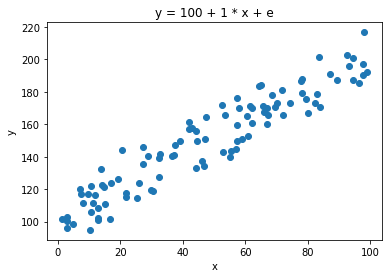

In [34]:
# 真のデータ生成過程
n = 100
np.random.seed(0)
x = np.random.uniform(1, 100, size=n)
e = np.random.normal(loc=0, scale=10, size=n)
beta0 = 100
beta1 = 1
y = beta0 + beta1 * x + e

df = pd.DataFrame({"y": y, "x": x})
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"y = {beta0} + {beta1} * x + e")

In [35]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer

models = [
    smf.ols('y ~ x', data=df).fit(),
    smf.ols('y ~ np.log(x)', data=df).fit(),
    smf.ols('np.log(y) ~ x', data=df).fit(),
    smf.ols('np.log(y) ~ np.log(x)', data=df).fit(),
]
Stargazer(models)

In [38]:
from myst_nb import glue
beta1_hat = models[0].params[1]
glue("model1_beta1_hat", beta1_hat)

0.9936298001416196

#### (1) について

$\hat{\beta}_1$は{glue:}`model1_beta1_hat`となった


In [37]:
from myst_nb import glue
beta1_hat = models[1].params[1]
glue("model2_beta1_hat", beta1_hat)

28.741356829043305

#### (2) について

$\hat{\beta}_1$は{glue:}`model2_beta1_hat`となった


In [49]:
beta0_, beta1_ = models[1].params

a = beta0_ + beta1_ * x.mean()
b = beta0_ + beta1_ * x.mean() * 1.01
b - a

13.740262651813055

In [50]:
beta0_, beta1_ = models[1].params

a = beta0_ + beta1_ * x.max()
b = beta0_ + beta1_ * x.max() * 1.01
b - a

28.410546676840113

In [44]:
from myst_nb import glue
beta1_hat = models[2].params[1]
glue("model3_beta1_hat", beta1_hat)

0.00683130284764578

#### (3) について

$\hat{\beta}_1$は{glue:}`model3_beta1_hat`となった


In [45]:
models[2].params

Intercept    4.661085
x            0.006831
dtype: float64

In [47]:
beta0_, beta1_ = models[2].params
a = beta0_ + beta1_ * x.mean()
b = beta0_ + beta1_ * (x.mean() + 1)
b - a

0.006831302847645659